In [1]:
# 
suppressMessages(library(SeuratDisk))
suppressMessages(library(SeuratData))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))

Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'BSgenome' was built under R version 4.3.2"
Warning message:
"package 'Biostrings' was built under R version 4.3.2"
Warning message:
"package 'XVector' was built under R version 4.3.2"
Warning message:
"package 'BiocIO' was built under R ver

In [2]:
rds_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/filtered_signac/signac.rds.rds"

In [3]:
adata <- readRDS(rds_path)
adata

An object of class Seurat 
230779 features across 6798 samples within 2 assays 
Active assay: peaks (132723 features, 0 variable features)
 1 other assay present: consensus_peaks

In [4]:
DefaultAssay(adata) <- "consensus_peaks"

In [5]:
adata

An object of class Seurat 
230779 features across 6798 samples within 2 assays 
Active assay: consensus_peaks (98056 features, 0 variable features)
 1 other assay present: peaks

In [7]:
head(adata@meta.data)

,orig.ident,nCount_peaks,nFeature_peaks,dataset,annotation,nCount_consensus_peaks,nFeature_consensus_peaks
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>
dm25a_AAACAGCCATTGTGCA-1,SeuratProject,6905,3565,dm25a,SC.EC.1,3906,3565
dm25a_AAACATGCAATTGAGA-1,SeuratProject,16026,7313,dm25a,SC.EC.1,8933,7181
dm25a_AAACCGAAGCCATCAG-1,SeuratProject,18247,8490,dm25a,SC.EC.1,10119,8187
dm25a_AAACCGGCAGGTTACC-1,SeuratProject,21715,10018,dm25a,SC.EC.1,12197,9621
dm25a_AAACCGGCAGTTATCG-1,SeuratProject,17242,7872,dm25a,SC.EC.1,9555,7590
dm25a_AAACGCGCACAAAGAC-1,SeuratProject,6295,3216,dm25a,SC.EC.1,3500,3190


In [8]:
# ATAC analysis
adata <- RunTFIDF(adata)
adata <- FindTopFeatures(adata, min.cutoff='q0')
adata <- RunSVD(adata)
adata <- RunUMAP(adata, reduction='lsi', dims=2:50, reduction.name='umap.atac', reduction.key='atacUMAP_')

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
07:41:10 UMAP embedding parameters a = 0.9922 b = 1.112

07:41:10 Read 6798 rows and found 49 numeric columns

07:41:10 Using Annoy for neighbor search, n_neighbors = 30

07:41:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:41:11 Writing NN index file to temp file /tmp/Rtmp8eli4u/file2e27df303a5fd9

07:41:11 Searching Annoy index using 1 thread, search_k = 3000

07:41:14 Annoy recall = 100%

07:41:15 Commencing 

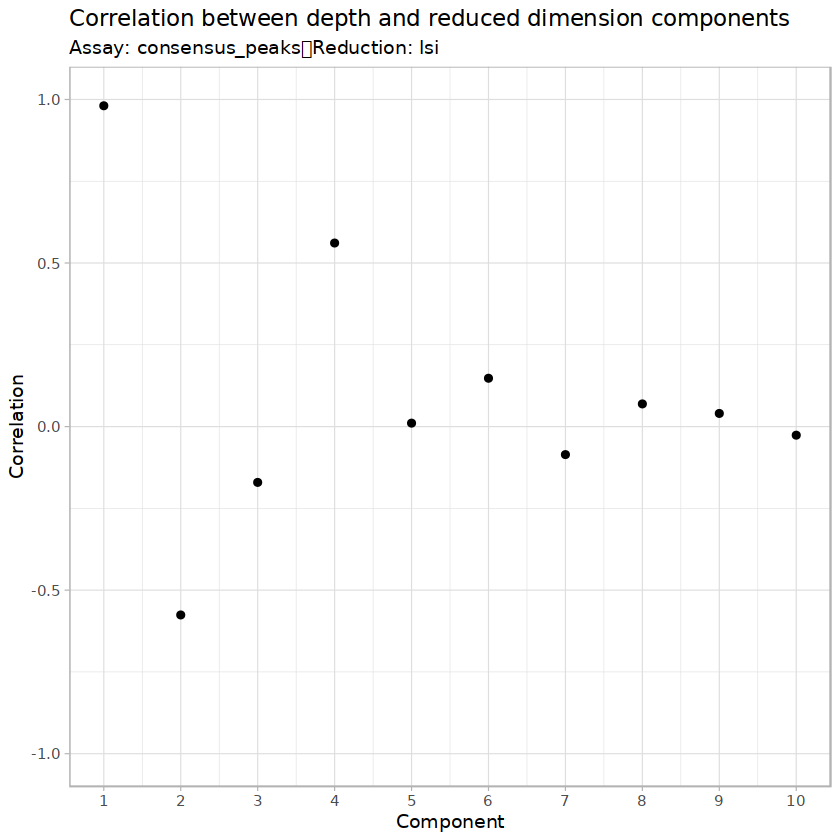

In [10]:
DepthCor(adata)

In [12]:
adata <- FindNeighbors(object = adata, reduction = 'lsi', dims = 2:30)
adata <- FindClusters(object = adata, verbose = FALSE, algorithm = 3)

Computing nearest neighbor graph



Computing SNN



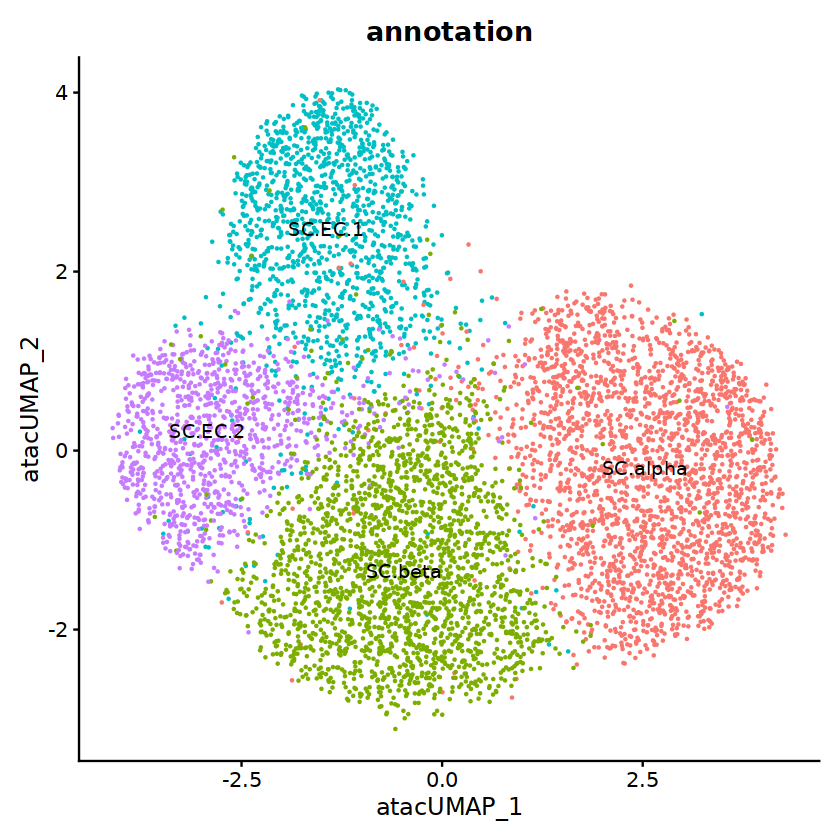

In [14]:
DimPlot(object = adata, group.by = 'annotation', label = TRUE) + NoLegend()